### Data Drift: Visualizing Concept Drift
**Description**: Simulate concept drift by gradually changing the distribution of a binary target variable over simulated time periods. Plot these changes.

Running concept drift simulation test...
Sample data:
   period  target
0       0       0
1       0       0
2       0       0
3       0       0
4       0       0


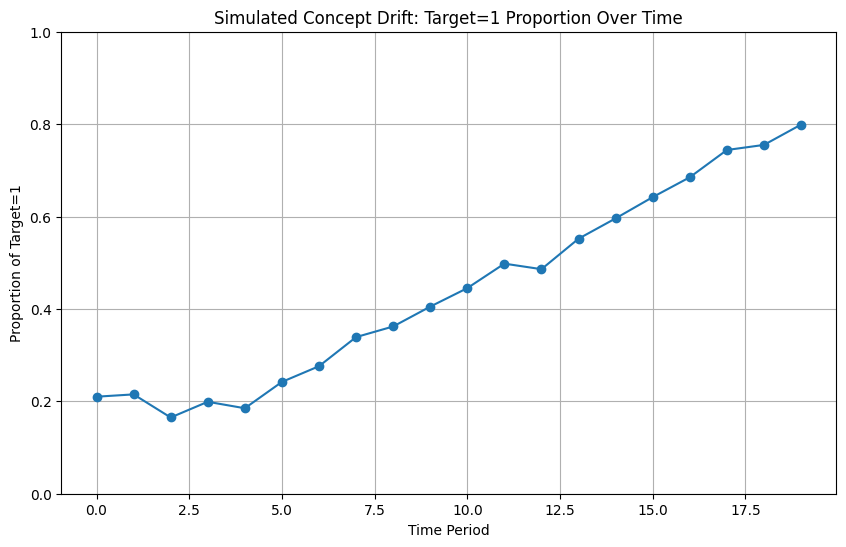

Test completed.



In [1]:
# write your code from here  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def simulate_concept_drift(n_periods=20, samples_per_period=1000, drift_start=5):
    """
    Simulate binary target distribution drift over time.
    
    Parameters:
        n_periods (int): Number of time periods to simulate
        samples_per_period (int): Number of samples per period
        drift_start (int): Period at which drift starts
    
    Returns:
        DataFrame with columns ['period', 'target']
    """
    periods = []
    targets = []

    for period in range(n_periods):
        # Before drift, target=1 probability is 0.2
        if period < drift_start:
            p = 0.2
        else:
            # After drift, gradually increase probability up to 0.8
            p = 0.2 + (period - drift_start + 1) * (0.6 / (n_periods - drift_start))

        # Generate binary targets with probability p
        targets_period = np.random.binomial(1, p, size=samples_per_period)
        periods.extend([period] * samples_per_period)
        targets.extend(targets_period)

    df = pd.DataFrame({'period': periods, 'target': targets})
    return df

def plot_concept_drift(df):
    if df is None or df.empty:
        print("No data to plot.")
        return

    # Calculate proportion of target=1 in each period
    drift_summary = df.groupby('period')['target'].mean()

    plt.figure(figsize=(10,6))
    plt.plot(drift_summary.index, drift_summary.values, marker='o', linestyle='-')
    plt.title('Simulated Concept Drift: Target=1 Proportion Over Time')
    plt.xlabel('Time Period')
    plt.ylabel('Proportion of Target=1')
    plt.grid(True)
    plt.ylim(0,1)
    plt.show()

def test_simulation():
    print("Running concept drift simulation test...")
    df = simulate_concept_drift()
    assert df is not None and not df.empty, "Simulation failed, empty DataFrame"
    assert 'period' in df.columns and 'target' in df.columns, "Missing columns in data"
    assert df['target'].isin([0,1]).all(), "Target contains non-binary values"

    print("Sample data:")
    print(df.head())

    plot_concept_drift(df)
    print("Test completed.\n")

if __name__ == "__main__":
    test_simulation()